In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_city_ride_data = pd.merge(ride_df,city_df, on ="city")

# Display the data table for preview
combined_city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Combine the data into a single dataset
combined_city_ride_data = pd.merge(ride_df,city_df,how = "left", on ="city")

# Display the data table for preview
combined_city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Create separate data frames based on city types - Urban, Suburban and Rural
urban_city = combined_city_ride_data.loc[(combined_city_ride_data["type"] == "Urban")]
suburban_city = combined_city_ride_data.loc[(combined_city_ride_data["type"] == "Suburban")]
rural_city = combined_city_ride_data.loc[(combined_city_ride_data["type"] == "Rural")]


In [4]:
# calculations of Average Fare for Urban,Suburban and Rural
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()

# calculations of Total Rides for Urban,Suburban and Rural
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']

# calculations of  Total Drivers for Urban,Suburban and Rural
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()


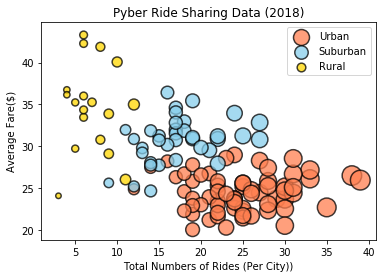

In [5]:
# Create scatter plots for Urban, Suburban and Rural cities
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.75,linewidth = 1.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.75,linewidth = 1.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.75,linewidth = 1.5, label="Rural")

# Chart title
plt.title("Pyber Ride Sharing Data (2018)")

# x label
plt.xlabel("Total Numbers of Rides (Per City))")

# y label
plt.ylabel("Average Fare($)")

# legend 
plt.legend(loc='upper right')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5.5
plt.rcParams["figure.figsize"] = fig_size

# Save an image of the chart and print to screen
plt.savefig("Images/Pyber Ride Sharing.png")
plt.show()


## Total Fares by City Type

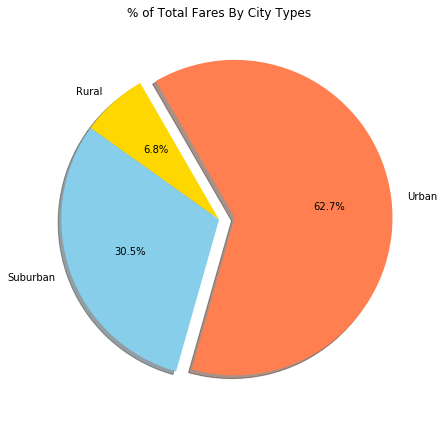

In [6]:
# Calculate Type Percents
# Calculate Total Fares by City Type
total_fare = combined_city_ride_data.groupby(['type'])['fare'].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# The colors of each section of the pie chart
colors = ["gold","skyblue","coral"]

# Build Pie Chart
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

explode = (0, 0, 0.1)
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares By City Types")
plt.tight_layout()

# Save Figure
plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()

## Total Rides by City Type

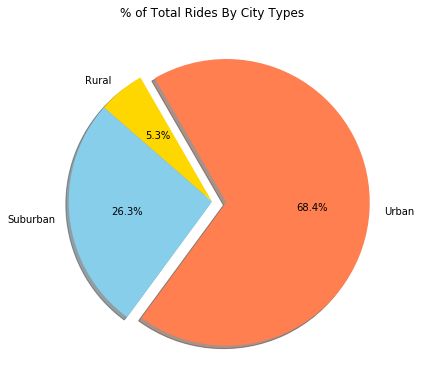

In [7]:
# Calculate Ride Percents
# Calculate Total Rides by City Type
total_ride = combined_city_ride_data.groupby(['type'])['ride_id'].count()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# The colors of each section of the pie chart
colors = ["gold","skyblue","coral"]

# Build Pie Chart
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7.5
fig_size[1] = 5.5
plt.rcParams["figure.figsize"] = fig_size

explode = (0, 0, 0.1)
plt.pie(total_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Rides By City Types")
plt.tight_layout()

# Show Figure
plt.savefig("Images/% of Total Rides By City Types.png")
plt.show()

## Total Drivers by City Type

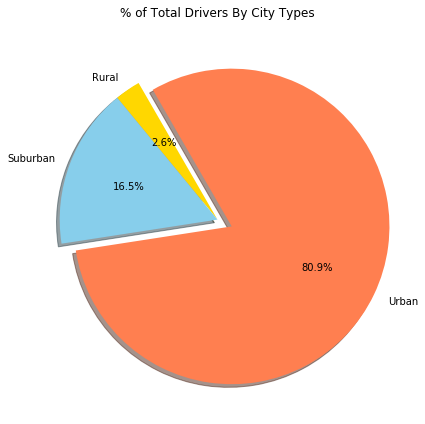

In [8]:
# Calculate Driver Percents
# Calculate Total Driver by City Type
total_drivers = city_df.groupby(['type'])['driver_count'].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# The colors of each section of the pie chart
colors = ["gold","skyblue","coral"]

# Build Pie Chart
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

explode = (0, 0, 0.1)
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Drivers By City Types")
plt.tight_layout()

# Show Figure
plt.savefig("Images/% of Total Drivers By City Types.png")
plt.show()
